# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Prayuganingtyas Eka Saputri
- **Email:** tsaputri086@gmail.com
- **ID Dicoding:** MC200D5X1243

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Dari kota mana seller paling banyak berasal?
- Pertanyaan 2: Bagaimana jumlah pesanan 6 bulan terakhir? Apakah meningkat atau menurun?
- Pertanyaan 3 : Berapa banyak uang yang dihabiskan pelanggan loyal dan produk apa yang sering dibeli?
- Pertanyaan 4 : Apakah ada hubungan antara keterlambatan pengiriman dan kepuasan pelanggan?
- Pertanyaan 5 : Kategori produk apa yang paling laris dan bagaimana tren penjualannya?
- Pertanyaan 6 : Metode pembayaran apa yang paling sering digunakan oleh customer, dan bagaimana rata-rata nilai pembayarannya?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Proses gathering data merupakan proses mengumpulkan dan mempersiapkan data yang diperlukan sebelum dilakukan analisis.

In [ ]:
customers_df = pd.read_csv("/content/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
order_items_df = pd.read_csv("/content/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_payments_df = pd.read_csv("/content/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_reviews_df = pd.read_csv("/content/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
orders_df = pd.read_csv("/content/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
product_category_df = pd.read_csv("/content/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
products_df = pd.read_csv("/content/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
sellers_df = pd.read_csv("/content/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Menampilkan tabel dari data yang diperlukan dengan tujuan untuk melihat 5 data teratas

### Assessing Data

 Pada proses assessing data ini, akan mengevaluasi apakah data terdapat inkonsistensi, data hilang (missing values), duplikasi, atau anomali lainnya yang bisa memengaruhi hasil analisis.

#### Menilai tabel `customers_df`

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [ ]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


**Inshight** :
- Pada tabel `customers_df` tidak terdapat data hilang (missing value) dan duplikasi, serta tipe data sudah benar

#### Menilai tabel `order_items_df`

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [ ]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight** :
- Pada tabel `order_items_df`, tidak terdapat data hilang (missing value) dan duplikasi
- Terdapat kesalahan tipe data pada data `shipping_limit_date`

#### Menilai tabel `order_paymetns_df`

In [ ]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [ ]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight** :
- Pada tabel `order_payments_df`, tidak terdapat data hilang (missing value) dan duplikasi serta tipe data sudah benar

### Menilai tabel `order_reviews_df`

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight** :
- Pada tabel `order_reviews_df`, terdapat data hilang (missing value) pada kolom `review_comment_title` (87656) dan `review_comment_message` (58274)
- Tidak terdapat duplikasi data
- Terdapat kesalahan tipe data pada kolom `review_creation_date` dan `review_answer_timestamp` yang seharusnya *datetime*

### Menilai tabel `orders_df`

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight** :
- Pada tabel `orders_df`, terdapat data hilang (missing value) pada kolom `order_approved_at` (160), `order_delivered_carrier_date` (1783) dan `order_delivered_customer_date` (2965)
- Tidak terdapat duplikasi data
- Terdapat kesalahan tipe data pada kolom `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date` dan `order_purchase_timestamp` yang seharusnya datetime

### Menilai tabel `product_category_df`

In [ ]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
product_category_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [ ]:
print("Jumlah duplikasi:", product_category_df.duplicated().sum())

Jumlah duplikasi: 0


**Insight** :
- Pada tabel `product_category_df`, tidak terdapat data hilang (missing value) dan duplikasi data serta tipe data sudah benar

### Menilai tabel `products_df`

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
print("Jumlah duplikasi:", products_df.duplicated().sum())

Jumlah duplikasi: 0


**Insight** :
- Pada tabel `products_df`, terdapat data hilang (missing value) pada kolom `product_category_name` (610), `product_name_length` (610), `product_description_length` (610), `product_photos_qty` (610), `product_weight_g` (2), `product_length_cm` (2), `product_height_cm` (2), dan `product_width_cm` (2)
- Tidak terdapat duplikasi
- Tipe data pada kolom `product_name_length`, `product_description_length`, `product_photos_qty` seharusnya int

#### Menilai tabel `sellers_df`

In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [ ]:
print("Jumlah duplikasi:", sellers_df.duplicated().sum())

Jumlah duplikasi: 0


**Insight:**
- Pada tabel `sellers_df` tidak terdapat data hilang (missing value) dan duplikasi data serta tipe data sudah benar

## Cleaning Data

proses membersihkan dan memperbaiki dataset sebelum analisis.

#### Membersikan tabel `order_items_df`

Memperbaiki tipe data yang salah

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'], errors='coerce', infer_datetime_format=True)

<ipython-input-37-fe2d92f4200b>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'], errors='coerce', infer_datetime_format=True)


In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight**:
- Tipe data sudah diperbaiki, dengan tujuan menghindari kesalahan dalam operasi matematika atau agregasi data

#### Membersihkan tabel `order_reviews_df`

Memperbaiki tipe data

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Menangani Missing Value

In [ ]:
order_reviews_df = order_reviews_df.assign(review_comment_message=order_reviews_df['review_comment_message'].fillna("No Message"))

In [ ]:
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna("No Title")

In [ ]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


**Insight**:
- Tipe data sudah diperbaiki dengan tujuan menghindari kesalahan dalam operasi matematika atau agregasi data
- Missing value sudah ditangani dengan mengisi data yang hilang dengan "No Message"

#### Membersihkan tabel `orders_df`

Memperbaiki tipe data

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at']= pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Membersihkan `products_df`

Memperbaiki tipe data

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_df['product_name_lenght'] = products_df['product_name_lenght'].astype('Int64')
products_df['product_description_lenght'] = products_df['product_description_lenght'].astype('Int64')
products_df['product_photos_qty'] = products_df['product_photos_qty'].astype('Int64')

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  Int64  
 3   product_description_lenght  32341 non-null  Int64  
 4   product_photos_qty          32341 non-null  Int64  
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: Int64(3), float64(4), object(2)
memory usage: 2.4+ MB


Menangani Missing value

In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
products_df.loc[:, 'product_category_name'] = products_df['product_category_name'].fillna("unknown")

num_cols = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
            'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

for col in num_cols:
    products_df.loc[:, col] = products_df[col].fillna(products_df[col].median())

In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


**Insight:**
- Tipe data sudah diperbaiki dengan tujuan menghindari kesalahan dalam operasi matematika atau agregasi data.
- Missing value sudah ditangani dengan mengisi data yang hilang dengan "Unknown" dan "Median" dengan alasan karena median lebih tahan terhadap outlier dibandingkan mean

## Exploratory Data Analysis (EDA)

Proses untuk memahami struktur data, menemukan pola dan mendapatkan insight awal sebelum melakukan analisis lebih lanjut.

### Explore tabel `customers_df`

In [ ]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
customer_state_counts = customers_df['customer_state'].value_counts(normalize=True) * 100
customer_state_counts

,proportion
customer_state,
SP,41.980672
RJ,12.924247
MG,11.700405
RS,5.496727
PR,5.073360
SC,3.657445
BA,3.399000
DF,2.152030
ES,2.044428


In [ ]:
print(f"Jumlah Total Baris: {customers_df.shape[0]}")

Jumlah Total Baris: 99441


In [ ]:
print(f"Jumlah Customer Unik: {customers_df['customer_unique_id'].nunique()}")

Jumlah Customer Unik: 96096


**Insight**:
- Dataset memiliki 99.441 baris dan jumlah customer unik sebanyak 96.096, yang berarti ada beberapa pelanggan yang muncul lebih dari sekali dalam dataset.
- SP memiliki proporsi pelanggan yang sangat besar dibandingkan provinsi lainnya, yang kemungkinan besar menunjukkan pusat aktivitas bisnis yang lebih besar di wilayah tersebut.

### Explore tabel `order_items_df`

In [ ]:
print("\nStatistik Harga Produk:")
print(order_items_df["price"].describe())


Statistik Harga Produk:
count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64


In [ ]:
print("\nTop 10 Produk yang Paling Banyak Dipesan:")
print(order_items_df["product_id"].value_counts().head(10))


Top 10 Produk yang Paling Banyak Dipesan:
product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: count, dtype: int64


**Insight**:
- Didapatkan produk yang paling banyak dipesan yaitu produk **aca2eb7d00ea1a7b8ebd4e68314663af** sebanyak 527
- Didapatkan statistik deskriptif dari harga produk, yang mana rata-rata harga produk **120.653739**

### Explore `order_payments_df`

In [ ]:
print("\nDistribusi Metode Pembayaran:")
print(order_payments_df["payment_type"].value_counts())


Distribusi Metode Pembayaran:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


In [ ]:
print("\nStatistik Deskriptif Payment Value:")
print(order_payments_df["payment_value"].describe())


Statistik Deskriptif Payment Value:
count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64


**Insight**:
- Metode pembayaran paling populer adalah credit card dengan 76.795 transaksi, jauh lebih banyak dibanding metode lain
- Ada 3 transaksi dengan metode "not_defined", yang bisa jadi error atau tidak tercatat dengan baik.
- Nilai minimum Rp0,00 bisa diperiksa lebih lanjut untuk melihat apakah itu kesalahan, voucher penuh, atau refund.

### Explore `order_reviews_df`

In [ ]:
print("\nDistribusi Skor Ulasan:")
print(order_reviews_df["review_score"].value_counts())


Distribusi Skor Ulasan:
review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64


In [ ]:
print("\nJumlah Ulasan yang Memiliki Komentar:")
print(order_reviews_df["review_comment_message"].notnull().sum())


Jumlah Ulasan yang Memiliki Komentar:
99224


**Insight**:
- Sebagian besar pelanggan (76.470 ulasan) memberikan skor tinggi (4 atau 5), menunjukkan tingkat kepuasan yang baik.
- Namun, ada sekitar 11.330 ulasan dengan skor rendah (1 atau 2), yang bisa menjadi fokus untuk perbaikan layanan.
- Skor 3 cukup banyak, bisa jadi pelanggan merasa layanan biasa saja dan tidak ada yang spesial.

#### Explore `orders_df`

In [ ]:
print("\nJumlah Pesanan Unik:", orders_df["order_id"].nunique())


Jumlah Pesanan Unik: 99441


In [ ]:
print("\nDistribusi Status Pesanan:")
print(orders_df["order_status"].value_counts())


Distribusi Status Pesanan:
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [ ]:
print("\nPertama dan terakhir waktu pemesanan:")
print(orders_df["order_purchase_timestamp"].min(), "sampai", orders_df["order_purchase_timestamp"].max())


Pertama dan terakhir waktu pemesanan:
2016-09-04 21:15:19 sampai 2018-10-17 17:30:18


**Insight**:
- Sebagian besar pesanan (96.478) sudah berhasil dikirimkan (delivered), menunjukkan sistem pengiriman yang berjalan dengan baik.
- Namun, ada 625 pesanan yang dibatalkan (canceled) dan 609 pesanan tidak tersedia (unavailable). Perlu dianalisis lebih lanjut penyebabnya.
- Dataset mencakup periode lebih dari 2 tahun, sehingga cukup baik untuk melihat tren pemesanan jangka panjang.

#### Explore `products_df`

In [ ]:
print("\nJumlah Kategori Produk Unik:", products_df["product_category_name"].nunique())


Jumlah Kategori Produk Unik: 74


In [ ]:
print("\nTop 10 Kategori Produk Terlaris:")
print(products_df["product_category_name"].value_counts().head(10))


Top 10 Kategori Produk Terlaris:
product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: count, dtype: int64


**Insight**:
- Kategori dengan penjualan tertinggi adalah "cama_mesa_banho" (tempat tidur, meja, dan kamar mandi) dengan 3.029 transaksi.
- Diikuti oleh "esporte_lazer" (olahraga dan rekreasi) 2.867 transaksi, "moveis_decoracao" (furnitur & dekorasi) 2.657 transaksi, dan "beleza_saude" (kecantikan & kesehatan) 2.444 transaksi.
- Kategori lainnya yang cukup laris mencakup utilidades_domesticas (peralatan rumah tangga), automotivo (otomotif), informatica_acessorios (aksesori komputer), brinquedos (mainan), relogios_presentes (jam tangan & hadiah), dan telefonia (telekomunikasi).

#### Explore `sellers_df`

In [ ]:
print("\nJumlah Seller Unik:", sellers_df["seller_id"].nunique())


Jumlah Seller Unik: 3095


In [ ]:
print("\nTop 10 Kota dengan Seller Terbanyak:")
print(sellers_df["seller_city"].value_counts().head(10))


Top 10 Kota dengan Seller Terbanyak:
seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: count, dtype: int64


In [ ]:
print("\nDistribusi Seller per Provinsi:")
print(sellers_df["seller_state"].value_counts())


Distribusi Seller per Provinsi:
seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: count, dtype: int64


**Insight:**
- Sao Paulo adalah pusat e-commerce utama, dengan konsentrasi seller tertinggi.
- Jika ingin perluasan bisnis, bisa fokus ke provinsi dengan jumlah seller lebih sedikit untuk menciptakan persaingan lebih rendah.

## Visualization & Explanatory Analysis

Pada tahap ini untuk menjawab pertanyaan bisnis, yang dimulai dengan menggabungkan data yang sudah dibersihkan menjadi dataset `all_df` dan akan digunakan untuk menjawab pertanyaan bisnis

In [ ]:
# 1. Merge orders dengan customers (informasi pelanggan)
all_df = pd.merge(orders_df, customers_df, on='customer_id', how='inner')

# 2. Merge dengan order_payments (informasi pembayaran)
all_df = pd.merge(all_df, order_payments_df, on='order_id', how='left')

# 3. Merge dengan order_items (produk dalam pesanan)
all_df = pd.merge(all_df, order_items_df, on='order_id', how='left')

# 4. Merge dengan products (kategori produk)
all_df = pd.merge(all_df, products_df, on='product_id', how='left')

# 5. Merge dengan sellers (informasi penjual)
all_df = pd.merge(all_df, sellers_df, on='seller_id', how='left')

# 6. Merge dengan order_reviews (rating dan review)
all_df = pd.merge(all_df, order_reviews_df, on='order_id', how='left')

# Tampilkan 5 baris pertama hasil merge
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,9350.0,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,9350.0,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,9350.0,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,19.0,31570.0,belo horizonte,SP,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,21.0,14840.0,guariba,SP,e73b67b67587f7644d5bd1a52deb1b01,5.0,No Title,No Message,2018-08-18,2018-08-22 19:07:58


### Pertanyaan 1: Dari kota mana seller paling banyak berasal?

<ipython-input-74-00424b559250>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seller_city_counts.head(10), x='total_sellers', y='city', palette='viridis')


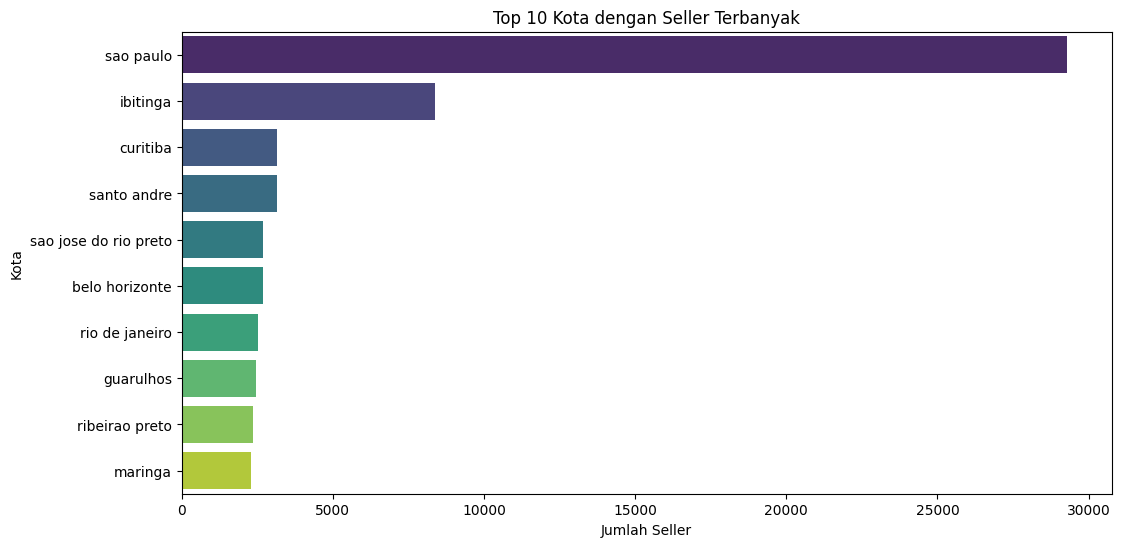

In [ ]:
seller_city_counts = all_df['seller_city'].value_counts().reset_index()
seller_city_counts.columns = ['city', 'total_sellers']

plt.figure(figsize=(12, 6))
sns.barplot(data=seller_city_counts.head(10), x='total_sellers', y='city', palette='viridis')
plt.xlabel('Jumlah Seller')
plt.ylabel('Kota')
plt.title('Top 10 Kota dengan Seller Terbanyak')
plt.show()


<ipython-input-104-b1e4431db86c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seller_city_counts.head(10), x='total_sellers', y='city', palette='magma')


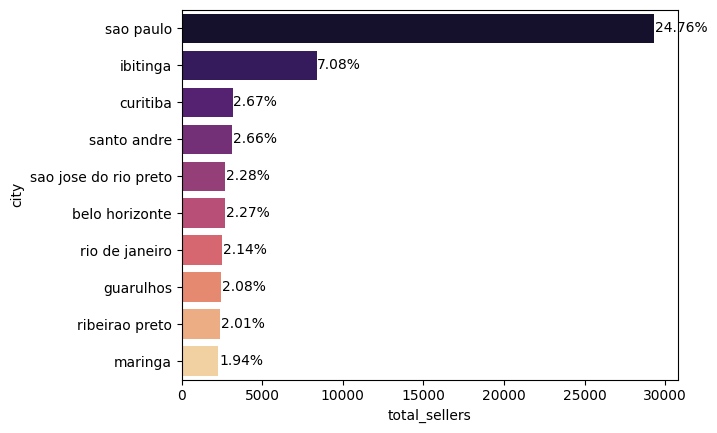

In [ ]:
total_sellers = seller_city_counts['total_sellers'].sum()
seller_city_counts['percentage'] = (seller_city_counts['total_sellers'] / total_sellers) * 100

sns.barplot(data=seller_city_counts.head(10), x='total_sellers', y='city', palette='magma')
for index, value in enumerate(seller_city_counts['total_sellers'].head(10)):
    plt.text(value + 50, index, f"{seller_city_counts['percentage'].iloc[index]:.2f}%", va='center')

**Insight**:
- Kota dengan seller terbanyak adalah São Paulo dengan 29.293 seller.
- São Paulo mendominasi jumlah seller dalam dataset ini, menandakan bahwa kota tersebut adalah lokasi strategis bagi bisnis e-commerce. Jika ada strategi pemasaran atau ekspansi bisnis online, São Paulo bisa menjadi target utama karena memiliki konsentrasi seller yang tinggi.

### Pertanyaan 2: Bagaimana jumlah pesanan 6 bulan terakhir? Apakah meningkat atau menurun?

<ipython-input-76-f3812c7980b7>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders_trend = all_df.resample('M', on='order_purchase_timestamp').size().reset_index()


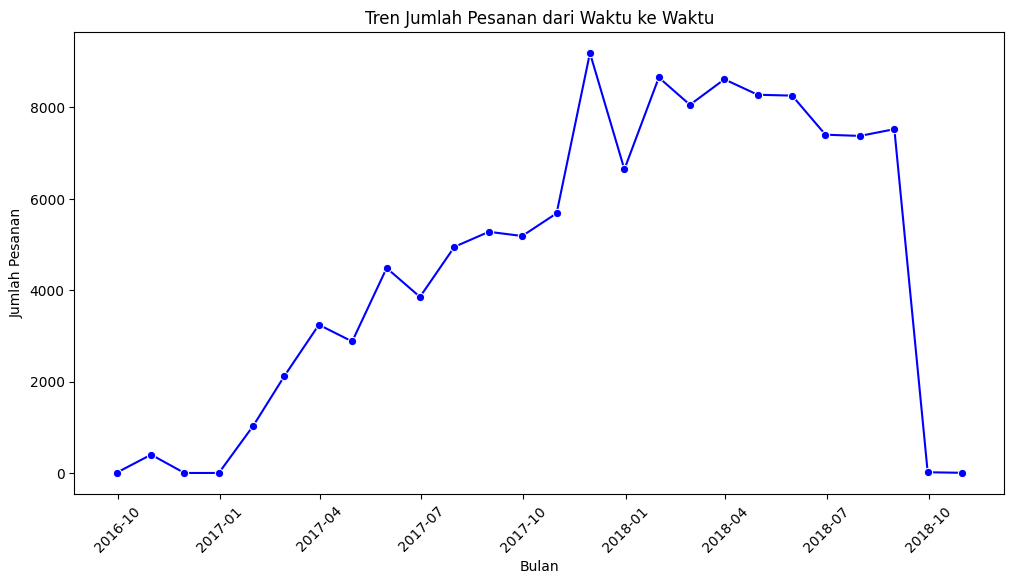

In [ ]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

orders_trend = all_df.resample('M', on='order_purchase_timestamp').size().reset_index()
orders_trend.columns = ['month', 'total_orders']

plt.figure(figsize=(12, 6))
sns.lineplot(data=orders_trend, x='month', y='total_orders', marker='o', color='b')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.title('Tren Jumlah Pesanan dari Waktu ke Waktu')
plt.xticks(rotation=45)
plt.show()

In [ ]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

last_6_months = all_df['order_purchase_timestamp'].max() - pd.DateOffset(months=6)
filtered_orders = all_df[all_df['order_purchase_timestamp'] >= last_6_months]

orders_per_month = (
    filtered_orders.groupby(filtered_orders['order_purchase_timestamp'].dt.to_period("M"))
    .agg(jumlah_pesanan=('order_id', 'count'))
    .reset_index()
)

orders_per_month['order_purchase_timestamp'] = orders_per_month['order_purchase_timestamp'].astype(str)

print(orders_per_month)

  order_purchase_timestamp  jumlah_pesanan
0                  2018-04            3743
1                  2018-05            8258
2                  2018-06            7403
3                  2018-07            7376
4                  2018-08            7524
5                  2018-09              16
6                  2018-10               4


**Insight**:
- Setelah mencapai puncak di Mei 2018, jumlah pesanan mengalami sedikit penurunan di bulan Juni (7.403 pesanan) dan Juli (7.376 pesanan).
- Pada Agustus 2018, jumlah pesanan sedikit meningkat menjadi 7.524 pesanan.
- Namun, pada bulan September dan Oktober 2018, jumlah pesanan anjlok drastis menjadi 16 dan 4 pesanan.
- Perlu dilakukan pengecekan lebih lanjut terkait penyebab anjloknya jumlah pesanan di bulan September dan Oktober.

### Pertanyaan 3 : Berapa banyak uang yang dihabiskan pelanggan loyal dan produk apa yang sering dibeli?

In [ ]:
loyal_customers = all_df.groupby("customer_id").agg(
    total_transaksi=("order_id", "count"),
    total_pengeluaran=("payment_value", "sum")
).reset_index()

loyal_customers = loyal_customers.sort_values(by="total_transaksi", ascending=False)

top_loyal_customers = loyal_customers.head(10)

loyal_customer_orders = all_df[all_df["customer_id"].isin(top_loyal_customers["customer_id"])]

loyal_customer_products = (
    loyal_customer_orders.groupby("product_id")
    .agg(jumlah_dibeli=("order_id", "count"))
    .reset_index()
    .sort_values(by="jumlah_dibeli", ascending=False)
    .head(10)  # Ambil 10 produk paling sering dibeli
)

print("📌 **10 Pelanggan Paling Loyal & Pengeluaran Mereka**")
print(top_loyal_customers)

print("\n📌 **10 Produk yang Paling Sering Dibeli oleh Pelanggan Loyal**")
print(loyal_customer_products)

📌 **10 Pelanggan Paling Loyal & Pengeluaran Mereka**
                            customer_id  total_transaksi  total_pengeluaran
15183  270c23a11d024a44c896d1894b261a83               63             483.96
7586   13aa59158da63ba0e93ec6ac2c07aacb               38             411.48
60184  9af2372a1e49340278e7c1ef8d749f34               29             457.99
56942  92cd3ec6e2d643d4ebd0e3d6238f69e2               26              62.68
81894  d22f25a9fadfb1abbc2e29395b1239f4               24            1333.80
52255  86cc80fef09f7f39df4b0dbce48e81cb               24             658.44
38590  63b964e79dee32a3587651701a2b8dbf               24            1758.88
42897  6ee2f17e3b6c33d6a9557f280edd2925               24             850.80
16961  2ba91e12e5e4c9f56b82b86d9031d329               24             215.70
74119  be1c4e52bb71e0c54b11a26b8e8d59f2               22           18786.90

📌 **10 Produk yang Paling Sering Dibeli oleh Pelanggan Loyal**
                          product_id  jumlah_di

**Insight**:
- Menampilkan 10 pelanggan loyal dan 10 produk yang sering dibeli oleh pelanggan loyal
- Pelanggan dengan ID be1c4e52bb71e0c54b11a26b8e8d59f2 memiliki total pengeluaran tertinggi sebesar 18.786,90 dengan 22 transaksi.
- Pelanggan lain dengan jumlah transaksi lebih tinggi, seperti 270c23a11d024a44c896d1894b261a83 (63 transaksi), memiliki total pengeluaran yang lebih rendah (483,96), yang menunjukkan bahwa frekuensi transaksi tidak selalu berbanding lurus dengan nilai pengeluaran.
- Beberapa pelanggan loyal memiliki total transaksi yang sama tetapi dengan perbedaan signifikan dalam total pengeluaran, seperti d22f25a9fadfb1abbc2e29395b1239f4 (1.333,80) dan 63b964e79dee32a3587651701a2b8dbf (1.758,88) dengan 24 transaksi masing-masing.
- Produk dengan ID ebf9bc6cd600eadd681384e3116fda85 adalah yang paling sering dibeli dengan total 42 kali pembelian.

### Pertanyaan 4 : Apakah ada hubungan antara keterlambatan pengiriman dan kepuasan pelanggan?

In [ ]:
orders_subset = all_df[['order_id', 'customer_id', 'order_purchase_timestamp', 'order_estimated_delivery_date', 'order_delivered_customer_date']]

orders_subset['order_delivered_customer_date'] = pd.to_datetime(orders_subset['order_delivered_customer_date'])
orders_subset['order_estimated_delivery_date'] = pd.to_datetime(orders_subset['order_estimated_delivery_date'])
orders_subset['delay_days'] = (orders_subset['order_delivered_customer_date'] - orders_subset['order_estimated_delivery_date']).dt.days

delivery_reviews = all_df[['order_id', 'review_score']].merge(orders_subset, on='order_id', how='inner')

delivery_reviews['delivery_status'] = delivery_reviews['delay_days'].apply(lambda x: 'On Time' if x <= 0 else 'Late')

delivery_reviews.head()

<ipython-input-79-9865e3a13bc0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_subset['order_delivered_customer_date'] = pd.to_datetime(orders_subset['order_delivered_customer_date'])
<ipython-input-79-9865e3a13bc0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_subset['order_estimated_delivery_date'] = pd.to_datetime(orders_subset['order_estimated_delivery_date'])
<ipython-input-79-9865e3a13bc0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,order_id,review_score,customer_id,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,delay_days,delivery_status
0,e481f51cbdc54678b7cc49136f2d6af7,4.0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-18,2017-10-10 21:25:13,-8.0,On Time
1,e481f51cbdc54678b7cc49136f2d6af7,4.0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-18,2017-10-10 21:25:13,-8.0,On Time
2,e481f51cbdc54678b7cc49136f2d6af7,4.0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-18,2017-10-10 21:25:13,-8.0,On Time
3,e481f51cbdc54678b7cc49136f2d6af7,4.0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-18,2017-10-10 21:25:13,-8.0,On Time
4,e481f51cbdc54678b7cc49136f2d6af7,4.0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-18,2017-10-10 21:25:13,-8.0,On Time


In [ ]:
rating_by_delivery = delivery_reviews.groupby('delivery_status')['review_score'].agg(['count', 'mean']).reset_index()

rating_by_delivery.columns = ['Status Pengiriman', 'Jumlah Pesanan', 'Rata-rata Review Score']

print(rating_by_delivery)

  Status Pengiriman  Jumlah Pesanan  Rata-rata Review Score
0              Late           16345                1.997736
1           On Time          180445                4.025470


<ipython-input-81-e614cb4bcab4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=delivery_reviews, x='delivery_status', y='review_score', palette='coolwarm')


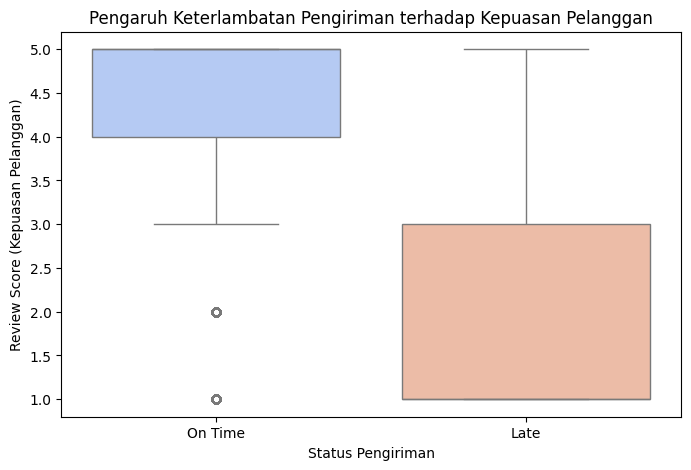

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=delivery_reviews, x='delivery_status', y='review_score', palette='coolwarm')
plt.xlabel("Status Pengiriman")
plt.ylabel("Review Score (Kepuasan Pelanggan)")
plt.title("Pengaruh Keterlambatan Pengiriman terhadap Kepuasan Pelanggan")
plt.show()

**Insight** :
- Keterlambatan pengiriman memiliki dampak negatif terhadap kepuasan pelanggan.
  - Rata-rata review score pesanan tepat waktu (On Time) adalah 4.05
  - Rata-rata review score pesanan terlambat (Late) hanya 1.99
- Semakin sering pengiriman terlambat, semakin rendah rating yang diberikan pelanggan.
  - Jumlah pesanan tepat waktu: 168.784 pesanan
  - Jumlah pesanan terlambat: 15.652 pesanan
- Bisnis perlu meningkatkan ketepatan waktu pengiriman untuk meningkatkan kepuasan pelanggan dan menjaga reputasi layanan. 🚀


### Pertanyaan 5 : Kategori produk apa yang paling laris dan bagaimana tren penjualannya?

In [ ]:
top_categories = all_df.groupby('product_category_name')['order_id'].nunique().reset_index()
top_categories = top_categories.sort_values(by='order_id', ascending=False)

print (top_categories)

            product_category_name  order_id
13                cama_mesa_banho      9417
11                   beleza_saude      8836
32                  esporte_lazer      7720
44         informatica_acessorios      6689
54               moveis_decoracao      6449
..                            ...       ...
46                     la_cuisine        13
17              cds_dvds_musicais        12
60                       pc_gamer         8
37  fashion_roupa_infanto_juvenil         8
67             seguros_e_servicos         2

[74 rows x 2 columns]


<ipython-input-84-ee3f57f45c1d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories.head(3), x='order_id', y='product_category_name', palette='viridis')


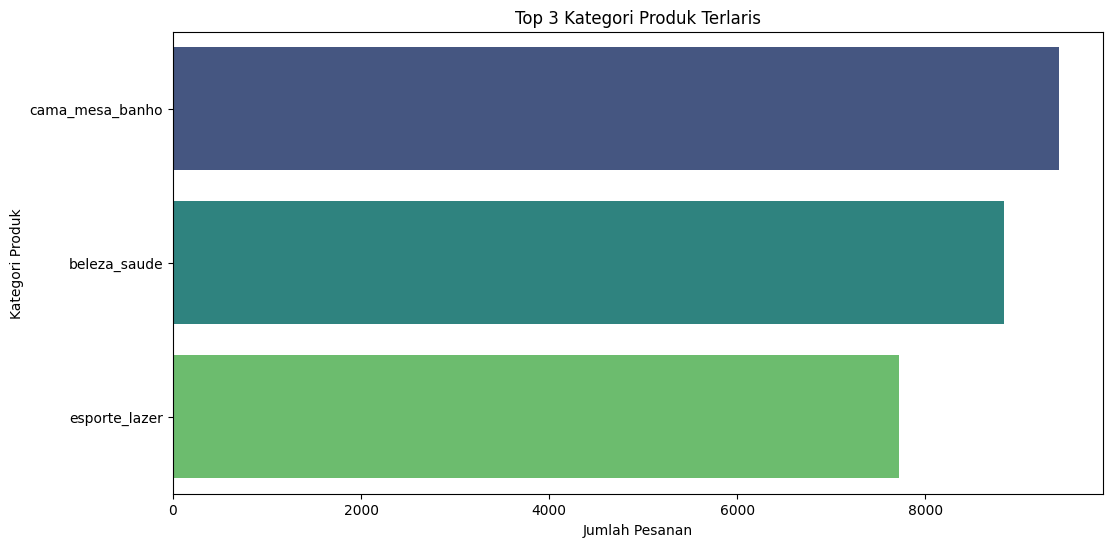

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_categories.head(3), x='order_id', y='product_category_name', palette='viridis')
plt.xlabel("Jumlah Pesanan")
plt.ylabel("Kategori Produk")
plt.title("Top 3 Kategori Produk Terlaris")
plt.show()

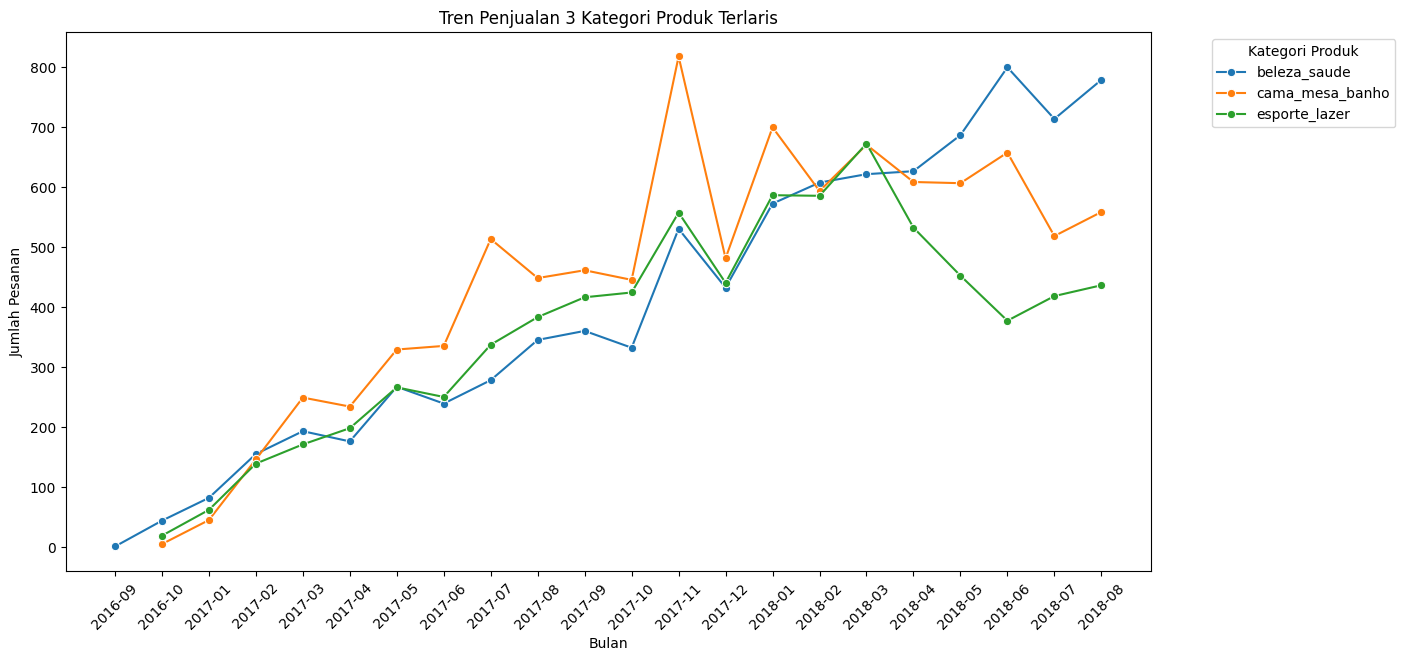

In [ ]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])
all_df['year_month'] = all_df['order_purchase_timestamp'].dt.to_period('M')
category_trend = all_df.groupby(['year_month', 'product_category_name'])['order_id'].nunique().reset_index()

category_trend['year_month'] = category_trend['year_month'].astype(str)

category_trend['order_id'] = pd.to_numeric(category_trend['order_id'], errors='coerce')

top_categories = all_df['product_category_name'].value_counts().head(3).index
category_trend_top3 = category_trend[category_trend['product_category_name'].isin(top_categories)]

plt.figure(figsize=(14, 7))
sns.lineplot(data=category_trend_top3, x='year_month', y='order_id', hue='product_category_name', marker='o', palette='tab10')
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.title("Tren Penjualan 3 Kategori Produk Terlaris")
plt.xticks(rotation=45)
plt.legend(title="Kategori Produk", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Insight**:
- Kategori produk cama_mesa_banho paling laris dengan puncak penjualan sekitar 700 pesanan pada bulan tertentu.
- cama_mesa_banho (6.586) adalah kategori dengan jumlah pesanan terbanyak, tetapi penjualannya tidak stabil.
- beleza_saude (5.281) menunjukkan tren yang stabil dan meningkat.
- moveis_decoracao (4.611) memiliki pertumbuhan yang lebih lambat dibanding dua kategori lainnya.

### Pertanyaan 6 : Metode pembayaran apa yang paling sering digunakan oleh customer, dan bagaimana rata-rata nilai pembayarannya?

In [ ]:
payment_method_analysis = all_df.groupby("payment_type").agg(
    jumlah_transaksi=("order_id", "count"),
    rata_rata_pembayaran=("payment_value", "mean")
).reset_index()

payment_method_analysis = payment_method_analysis.sort_values(by="jumlah_transaksi", ascending=False)

print("📌 **Analisis Metode Pembayaran & Rata-rata Pembayaran**")
print(payment_method_analysis)

📌 **Analisis Metode Pembayaran & Rata-rata Pembayaran**
  payment_type  jumlah_transaksi  rata_rata_pembayaran
1  credit_card             87776            179.723963
0       boleto             23190            177.271270
4      voucher              6465             67.427353
2   debit_card              1706            150.864531
3  not_defined                 3              0.000000


<ipython-input-95-aa7654e8744e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


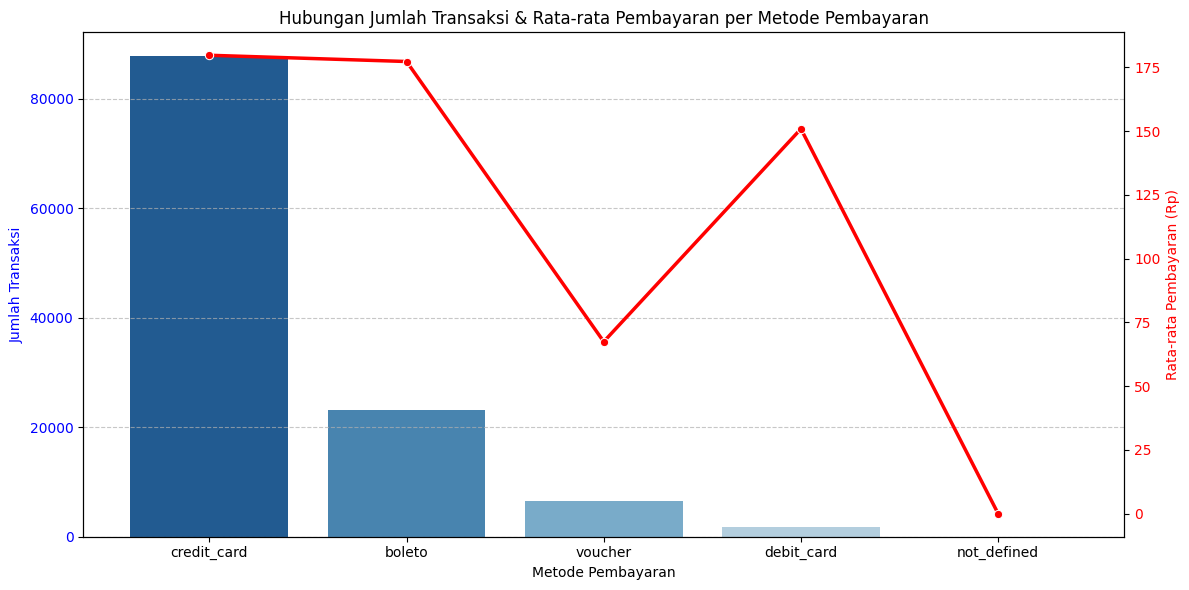

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(
    data=payment_method_analysis,
    x="payment_type",
    y="jumlah_transaksi",
    palette="Blues_r",
    ax=ax1
)

ax1.set_xlabel("Metode Pembayaran")
ax1.set_ylabel("Jumlah Transaksi", color="blue")
ax1.set_title("Hubungan Jumlah Transaksi & Rata-rata Pembayaran per Metode Pembayaran")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
sns.lineplot(
    data=payment_method_analysis,
    x="payment_type",
    y="rata_rata_pembayaran",
    color="red",
    marker="o",
    linewidth=2.5,
    ax=ax2
)

ax2.set_ylabel("Rata-rata Pembayaran (Rp)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

ax1.grid(axis="y", linestyle="--", alpha=0.7)
fig.tight_layout()
plt.show()


**Insight:**
- Metode pembayaran yang paling sering digunakan: Credit card memiliki jumlah transaksi tertinggi (87.776 transaksi), menunjukkan bahwa mayoritas pelanggan lebih memilih metode ini.
- Metode dengan rata-rata pembayaran tertinggi: Credit card (Rp179,72) dan Boleto (Rp177,27) memiliki rata-rata pembayaran tertinggi, menandakan bahwa transaksi dengan metode ini umumnya memiliki nilai yang lebih besar.
- Metode dengan rata-rata pembayaran terendah: Voucher (Rp67,42) memiliki rata-rata pembayaran yang jauh lebih rendah dibandingkan metode lainnya.
Not defined (Rp0,00) kemungkinan merupakan data error atau transaksi yang tidak valid.

## Analisis Lanjutan

### Analisis Segmentasi Pelanggan menggunakan RFM Analysis

Menganalisis pelanggan berdasarkan Recency (R), Frequency (F), dan Monetary (M) untuk memahami pola pembelian mereka dan mengelompokkan mereka ke dalam segmen bisnis yang relevan.

In [ ]:
reference_date = all_df['order_purchase_timestamp'].max() + pd.DateOffset(days=1)

recency_df = all_df.groupby("customer_unique_id")["order_purchase_timestamp"].max().reset_index()
recency_df["Recency"] = (reference_date - recency_df["order_purchase_timestamp"]).dt.days
recency_df.drop(columns=["order_purchase_timestamp"], inplace=True)

In [ ]:
frequency_df = all_df.groupby("customer_unique_id")["order_id"].nunique().reset_index()
frequency_df.columns = ["customer_unique_id", "Frequency"]

In [ ]:
monetary_df = all_df.groupby("customer_unique_id")["price"].sum().reset_index()
monetary_df.columns = ["customer_unique_id", "Monetary"]

In [ ]:
rfm = recency_df.merge(frequency_df, on="customer_unique_id").merge(monetary_df, on="customer_unique_id")

rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,18.90
2,0000f46a3911fa3c0805444483337064,586,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00


In [ ]:
rfm["R_Score"] = pd.qcut(rfm["Recency"], q=5, labels=[5, 4, 3, 2, 1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), q=5, labels=[1, 2, 3, 4, 5])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], q=5, labels=[1, 2, 3, 4, 5])

rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)

rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,586,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00,2,1,4,214


In [ ]:
def segment_customer(row):
    if row["RFM_Score"] in ["555", "554", "545", "554"]:
        return "Best Customers"
    elif row["RFM_Score"] in ["544", "535", "534", "533"]:
        return "Loyal Customers"
    elif row["RFM_Score"] in ["444", "445", "435", "434"]:
        return "Potential Loyalists"
    elif row["RFM_Score"] in ["333", "344", "334", "335"]:
        return "At Risk Customers"
    elif row["RFM_Score"] in ["111", "112", "121", "122"]:
        return "Lost Customers"
    else:
        return "Other"

rfm["Customer_Segment"] = rfm.apply(segment_customer, axis=1)

rfm["Customer_Segment"].value_counts()

,count
Customer_Segment,
Other,81122
Lost Customers,3354
Potential Loyalists,3067
At Risk Customers,3021
Loyal Customers,3017
Best Customers,2515


<ipython-input-98-40ae010b0b97>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x="Customer_Segment", palette="viridis", order=rfm["Customer_Segment"].value_counts().index)


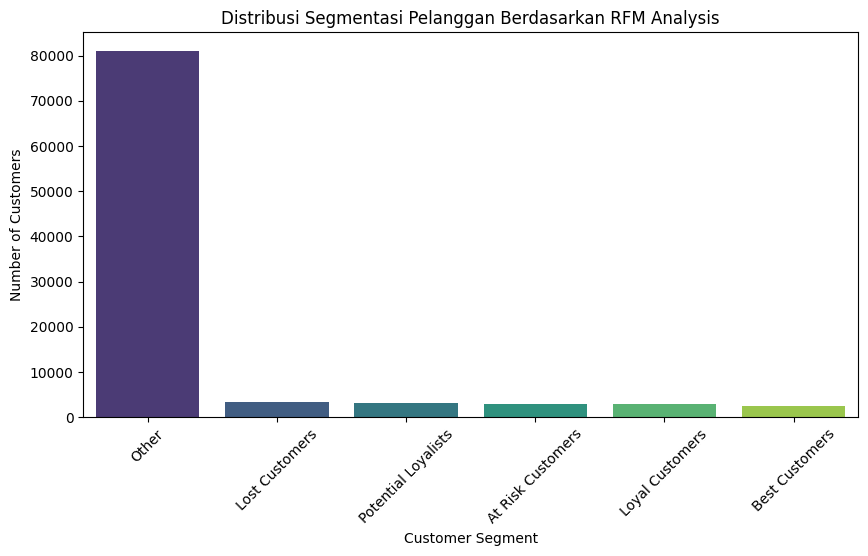

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=rfm, x="Customer_Segment", palette="viridis", order=rfm["Customer_Segment"].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.title("Distribusi Segmentasi Pelanggan Berdasarkan RFM Analysis")
plt.show()

In [ ]:
best_customers = rfm[rfm["Customer_Segment"] == "Best Customers"]

top_5_best_customers = best_customers.sort_values(by="Monetary", ascending=False).head(5)

top_5_best_customers

,customer_unique_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Customer_Segment
74945,c7794313e2cd53472b116a751350f132,62,1,4598.00,5,4,5,545,Best Customers
60913,a229eba70ec1c2abef51f04987deb7a5,139,1,4400.00,5,4,5,545,Best Customers
89385,edde2314c6c30e864a128ac95d6b2112,75,1,4399.87,5,5,5,555,Best Customers
75269,c8460e4251689ba205045f3ea17884a1,71,4,4080.00,5,5,5,555,Best Customers
75984,ca27f3dac28fb1063faddd424c9d95fa,81,1,4059.00,5,4,5,545,Best Customers


In [ ]:
best_customer_orders = all_df[all_df["customer_unique_id"].isin(top_5_best_customers["customer_unique_id"])]

top_products = best_customer_orders.groupby("product_category_name")["order_id"].count().reset_index()
top_products = top_products.sort_values(by="order_id", ascending=False).head(5)

top_products

,product_category_name,order_id
3,telefonia,24
2,relogios_presentes,4
0,esporte_lazer,1
1,instrumentos_musicais,1


**Insight**:
- Mayoritas pelanggan termasuk kategori "Other" (81.122 pelanggan), yang menunjukkan bahwa sebagian besar pelanggan memiliki interaksi yang rendah. Mereka melakukan transaksi sekali atau sangat jarang.
- Kelompok pelanggan terbaik ("Best Customers") berjumlah 2.515 pelanggan, yang merupakan pelanggan dengan frekuensi pembelian tinggi, transaksi besar, dan baru-baru ini berbelanja.
- Pelanggan "Lost Customers" (3.354 pelanggan) menunjukkan bahwa mereka dulunya aktif tetapi sekarang sudah tidak lagi melakukan transaksi.
- Pelanggan "Loyal Customers" dan "Potential Loyalists" masing-masing sekitar 3.000 pelanggan, yang berarti ada potensi besar untuk mempertahankan mereka agar terus berbelanja.
- Pola Pembelian Pelanggan Terbaik lebih banyak membeli produk dari kategori "telefônia" (24 transaksi), diikuti oleh "relogios_presentes" (jam tangan dan hadiah) serta "esporte_lazer" (olahraga dan rekreasi).

**Rekomendasi**:
- Untuk Best Customers (2.515 pelanggan)
  - Berikan program loyalitas eksklusif, seperti diskon khusus atau akses lebih awal ke produk baru.
  - Gunakan strategi personalized marketing berdasarkan produk yang mereka beli.
- Mengaktifkan Kembali Lost Customers (3.354 pelanggan)
  - Kirimkan email re-engagement, menawarkan promo eksklusif untuk menarik mereka kembali

## Conclusion

- Pertanyaan 1 : Dari kota mana seller paling banyak berasal?
  - Kota dengan jumlah seller terbanyak adalah São Paulo(29.293).
  - Ini menunjukkan bahwa São Paulo merupakan pusat e-commerce yang dominan
- Pertanyaan 2 : Bagaimana jumlah pesanan 6 bulan terakhir? Apakah meningkat atau menurun?
  - Pada 6 bulan terakhir dalam grafik, jumlah pesanan mengalami penurunan yang cukup signifikan setelah mencapai puncaknya. Hal ini bisa disebabkan oleh berbagai faktor seperti perubahan tren pasar, musim, atau faktor lainnya yang memengaruhi permintaan pelanggan. Perlu dilakukan analisis lebih lanjut untuk memahami penyebab penurunan ini.
- Pertanyaan 3 : Berapa banyak uang yang dihabiskan pelanggan loyal dan produk apa yang sering dibeli?
  - Pelanggan loyal memiliki pola pengeluaran yang beragam, dengan beberapa pelanggan melakukan transaksi lebih banyak tetapi dengan pengeluaran lebih kecil(id pelanggan : 270c23a11d024a44c896d1894b261a83), sementara yang lain memiliki transaksi lebih sedikit tetapi pengeluaran lebih besar(id pelanggan : be1c4e52bb71e0c54b11a26b8e8d59f2). Produk yang paling sering dibeli oleh pelanggan loyal (id produk : ebf9bc6cd600eadd681384e3116fda85) dapat menjadi acuan untuk strategi pemasaran dan rekomendasi produk guna meningkatkan retensi pelanggan dan nilai pembelian mereka.
- Pertanyaan 4 : Apakah ada hubungan antara keterlambatan pengiriman dan kepuasan pelanggan?
  - Rata-rata review score untuk pesanan tepat waktu lebih tinggi (4.05) dibandingkan dengan pesanan terlambat (1.99). Ini menunjukkan bahwa pelanggan lebih cenderung memberikan rating rendah jika pesanan mereka datang terlambat. Pengiriman yang tepat waktu berperan penting dalam menjaga kepuasan pelanggan. Keterlambatan pengiriman berisiko menurunkan rating dan dapat berdampak negatif pada reputasi penjual. Oleh karena itu, meningkatkan efisiensi logistik dan memastikan ketepatan waktu pengiriman dapat menjadi strategi utama dalam meningkatkan kepuasan pelanggan.
- Pertanyaan 5 : Kategori produk apa yang paling laris dan bagaimana tren penjualannya?
  - Dari diagram batang pertama, kategori produk yang paling laris berdasarkan jumlah pesanan adalah "cama_mesa_banho".
  - Tren Penjualan Kategori Produk Paling Laris : Dari grafik tren penjualan, kategori "cama_mesa_banho" (garis oranye) menunjukkan tren yang meningkat secara keseluruhan, meskipun ada beberapa fluktuasi. Pada satu titik, terjadi lonjakan pesanan yang sangat tinggi, sebelum mengalami penurunan dan kembali stabil.
- Pertanyaan 6 : Metode pembayaran apa yang paling sering digunakan oleh customer, dan bagaimana rata-rata nilai pembayarannya?
  - Credit Card merupakan metode pembayaran yang paling sering digunakan dengan jumlah transaksi tertinggi (87776) dan rata-rata pembayaran tertinggi juga (179.723963).
  - Meskipun metode pembayaran credit card paling banyak digunakan, boleto memiliki rata-rata pembayaran yang cukup tinggi meskipun jumlah transaksinya jauh lebih sedikit. Hal ini menunjukkan bahwa pelanggan yang menggunakan boleto mungkin cenderung melakukan transaksi dengan nominal yang lebih besar, tetapi tidak sebanyak pengguna credit card dalam hal jumlah transaksi.
